In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DADOS = '..\dados\Mall_customers_sem_CustumerID.csv'
df_clustered = pd.read_csv(DADOS)

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


prepocessing  = ColumnTransformer(
    [
        ('standarf',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
        ('onehot',OneHotEncoder(handle_unknown='infrequent_if_exist'),['Gender'])
    ]
    
)
prepocessing.fit(df_clustered)

ColumnTransformer(transformers=[('standarf', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['Gender'])])

In [3]:
df_scale  = pd.DataFrame(prepocessing.fit_transform(df_clustered),
                         columns = prepocessing.get_feature_names_out())

df_scale.head()


,standarf__Age,standarf__Annual Income (k$),standarf__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
df_scale.to_csv('..\dados\Mall_customers_sem_CustumerID_scaled.csv',index=False)

random_state 42


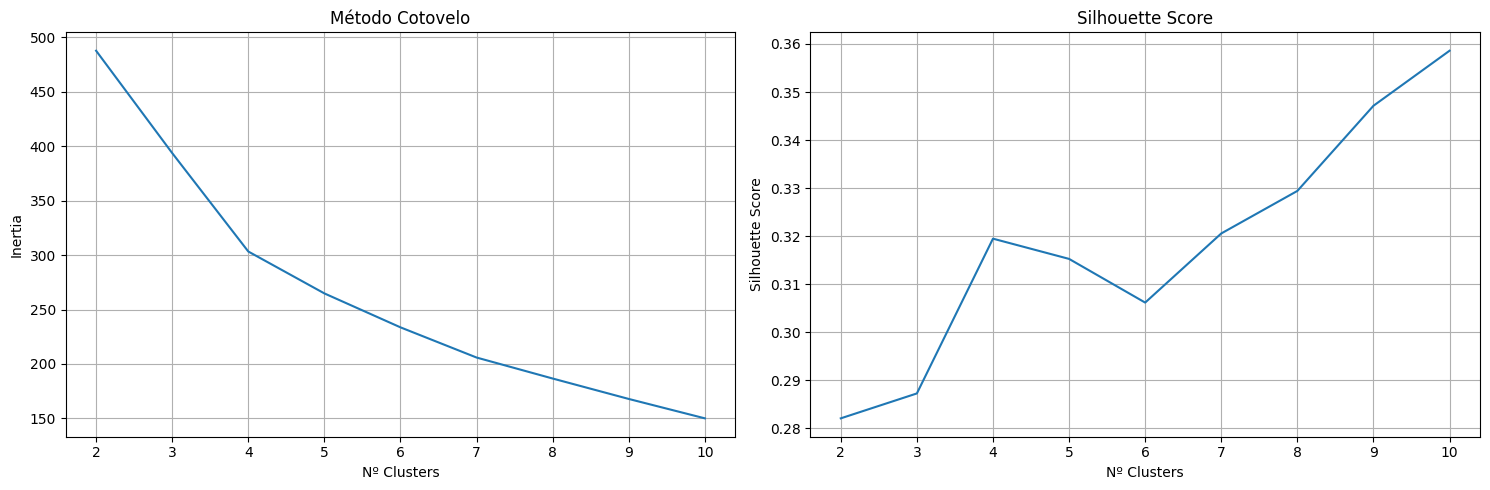

In [5]:
from  funcoes_auxiliares import graficos_elbow_silhouete

graficos_elbow_silhouete(df_scale,n_clusters=10,random_state=42)

In [6]:
from sklearn.cluster import KMeans
RANDOM_STATE = 42

prepocessing = ColumnTransformer(
    [
        ('standarf',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
        ('onehot',OneHotEncoder(handle_unknown='infrequent_if_exist'),['Gender'])
    ]
)



pipe = Pipeline(
    [
        ('prepocessing',prepocessing),
        ('model',KMeans(n_clusters=5,random_state=RANDOM_STATE,n_init = 10))
    ]
)

In [7]:
pipe.fit(df_clustered)

Pipeline(steps=[('prepocessing',
                 ColumnTransformer(transformers=[('standarf', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Gender'])])),
                ('model', KMeans(n_clusters=5, n_init=10, random_state=42))])

In [8]:
pipe['prepocessing'].get_feature_names_out()

array(['standarf__Age', 'standarf__Annual Income (k$)',
       'standarf__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [9]:
pipe['model'].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [10]:
df_clustered['Cluster'] = pipe['model'].labels_
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


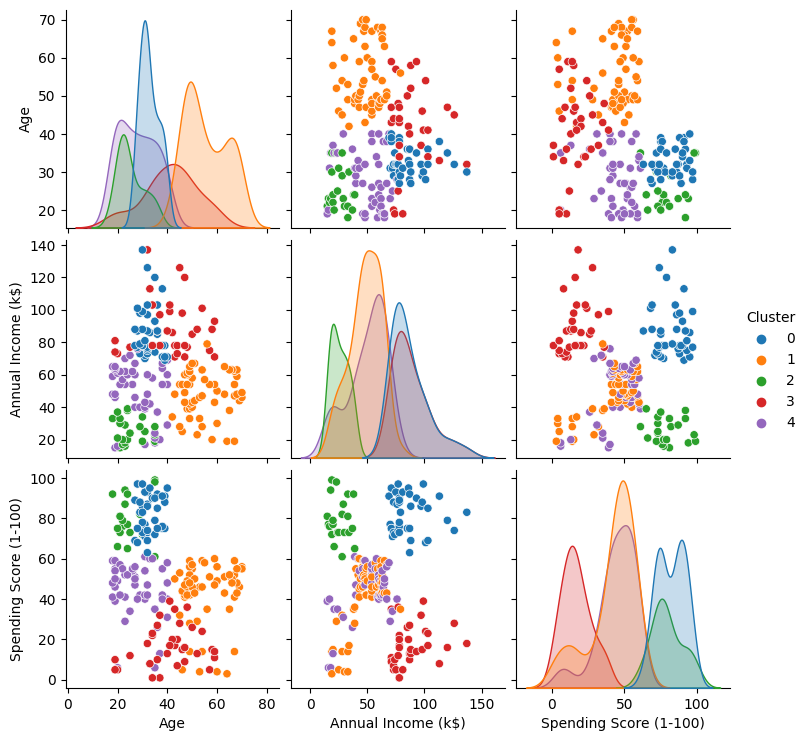

In [11]:
sns.pairplot(df_clustered,hue='Cluster',palette='tab10');

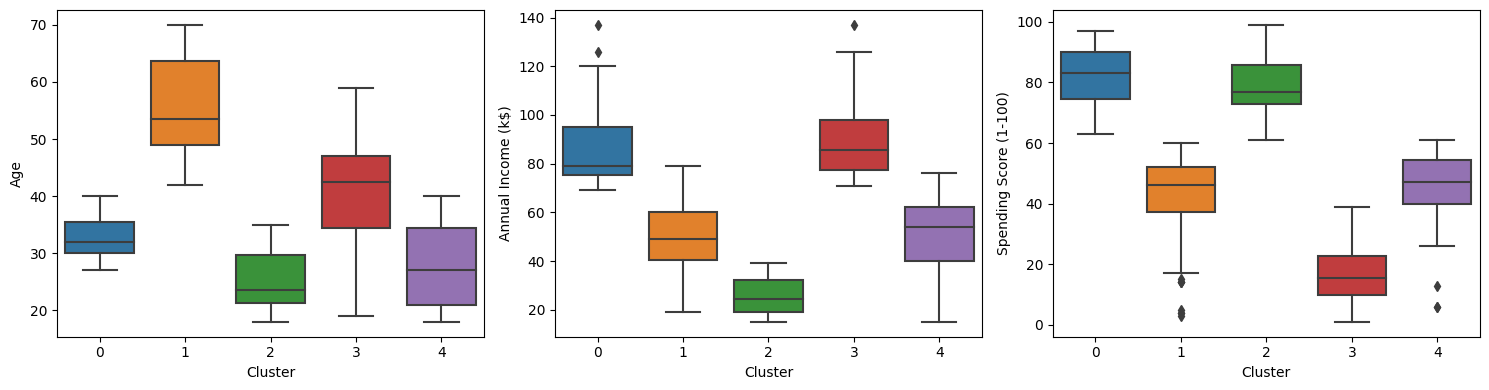

In [12]:
fif , axs = plt.subplots(nrows=1 , ncols=3,figsize =(15,4),tight_layout =True)
X = df_clustered.drop('Gender',axis=1)
for ax , col in zip(axs,X):
    sns.boxplot(data = df_clustered , x ="Cluster" , y =col ,ax = ax )

In [13]:
df_clustered.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')

In [14]:
df_clustered.Cluster.value_counts().sort_index()

Cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [15]:
kmeans = pipe['model']

In [16]:
kmeans.cluster_centers_[:,:-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [17]:
pipe['prepocessing'].get_feature_names_out()

array(['standarf__Age', 'standarf__Annual Income (k$)',
       'standarf__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [25]:
X = pd.DataFrame(pipe['prepocessing'].fit_transform(df_clustered.drop('Cluster',axis =1))[:,:-2],
                 columns = pipe['prepocessing'].get_feature_names_out()[:-2]
                 )

In [26]:
X

,standarf__Age,standarf__Annual Income (k$),standarf__Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


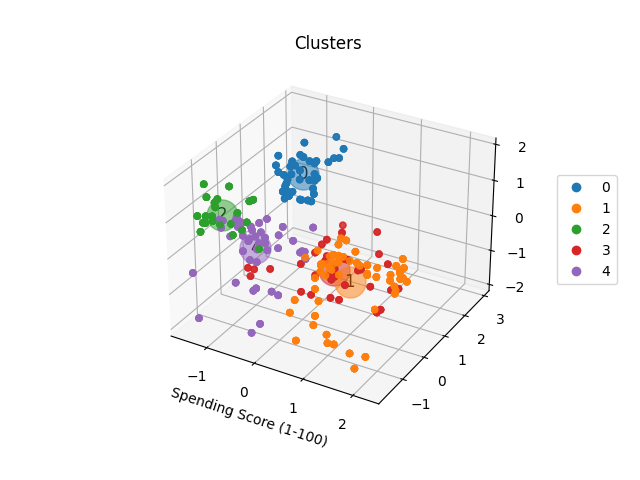

In [93]:
%matplotlib  ipympl
from matplotlib.colors import ListedColormap 

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

centroids = kmeans.cluster_centers_[:,:-2]

cores = plt.cm.tab10.colors[:5]
cores = ListedColormap(cores)


x = df_clustered.Age 
y = df_clustered['Annual Income (k$)']
z = df_clustered['Spending Score (1-100)']

x = X[:,0]
y = X[:,1]
z = X[:,2]

mostrar_centroids = True
mostrar_pontos = True


for i ,centroid in enumerate(centroids):

    if mostrar_centroids:
        ax.scatter(*centroid,s=500,alpha = 0.5)
        ax.text(*centroid,f'{i}',fontsize = 12,horizontalalignment ='center' , verticalalignment = 'center')
    
    if mostrar_pontos:
        s = ax.scatter(x,y,z,c=df_clustered.Cluster,cmap = cores)
        ax.legend(*s.legend_elements(),bbox_to_anchor = (1.3,0.7))
    

ax.set_xlabel('Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_xlabel('Spending Score (1-100)')
ax.set_title('Clusters')
plt.show()